In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df=pd.read_csv("./bios.csv")

In [80]:
df.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.1+ MB


In [89]:
df['born_date'] = pd.to_datetime(df['born_date'])  # Converts to datetime, invalid dates become NaT
df['died_date'] = pd.to_datetime(df['died_date'])


In [90]:
df[['athlete_id', 'born_date', 'died_date']].head()


,athlete_id,born_date,died_date
0,1,1886-12-12,1960-10-02
1,2,1969-04-01,NaT
2,3,1898-08-13,1994-07-17
3,4,1895-05-11,1978-03-20
4,5,1878-04-17,1930-07-25


In [91]:
df['height_cm'].fillna(df['height_cm'].median(), inplace=True)
df['weight_kg'].fillna(df['weight_kg'].median(), inplace=True)


/tmp/ipykernel_43581/3801016390.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['height_cm'].fillna(df['height_cm'].median(), inplace=True)
/tmp/ipykernel_43581/3801016390.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
# df['died_date'].fillna(pd.Timestamp('today'), inplace=True)  #Lets take they are alive today
# # df.fillna['died_date': pd.Timestamp('today')]

/tmp/ipykernel_43581/1005421847.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['died_date'].fillna(pd.Timestamp('today'), inplace=True)  #Lets take they are alive today


In [ ]:
df['time_lived_years'] = (df['died_date'] - df['born_date']).dt.days // 365 #Calculate Age

df['time_lived_years'].fillna((pd.Timestamp('today') - df['born_date']).dt.days // 365, inplace=True) #Handle NaT values as they are alive today


/tmp/ipykernel_43581/1794462505.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['time_lived_years'].fillna((pd.Timestamp('today') - df['born_date']).dt.days // 365, inplace=True)


In [104]:
df

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,time_lived_years
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,176.0,70.0,1960-10-02,73.0
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaT,56.0
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,95.0
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,82.0
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,176.0,70.0,1930-07-25,52.0
...,...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaT,23.0
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaT,25.0
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaT,26.0
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,70.0,1986-03-18,86.0


In [105]:
df["BMI"]=df["weight_kg"]/pow((df["height_cm"]/100),2) #Calculate BMI

In [106]:
df

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,time_lived_years,BMI
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,176.0,70.0,1960-10-02,73.0,22.598140
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaT,56.0,22.694019
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,95.0,22.694019
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,82.0,22.675737
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,176.0,70.0,1930-07-25,52.0,22.598140
...,...,...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaT,23.0,21.872423
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaT,25.0,23.030045
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaT,26.0,20.700817
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,70.0,1986-03-18,86.0,25.402816


In [125]:
average_bmi_reigon=df.groupby('born_region')["BMI"].mean()[:10]
print(average_bmi_reigon)

born_region
Aargau           22.973564
Abia             23.021665
Abidjan          22.643485
Abu Dhabi        23.774906
Abuja            23.932039
Abşeron          25.445743
Aceh             21.720722
Acklins          23.671254
Acre             23.045697
Ad-Dakhiliyah    22.683908
Name: BMI, dtype: float64


In [119]:
most_common_city=df["born_city"].mode()[0]
most_common_country=df["born_country"].mode()[0]
most_common_reigon=df["born_region"].mode()[0]
print(most_common_reigon)
print(most_common_country)
print(most_common_city)

England
USA
Budapest


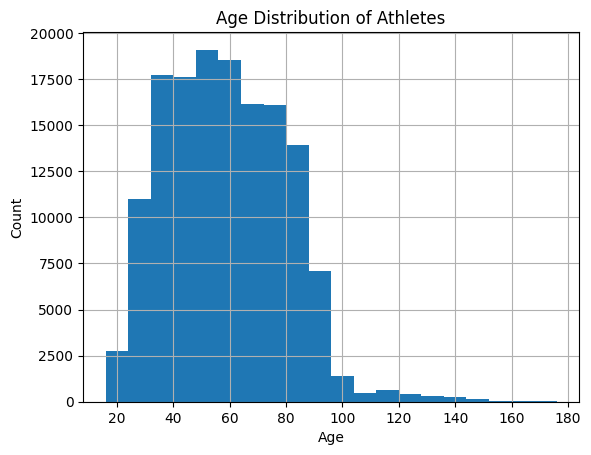

In [123]:
import matplotlib.pyplot as plt
df['time_lived_years'].hist(bins=20)
plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


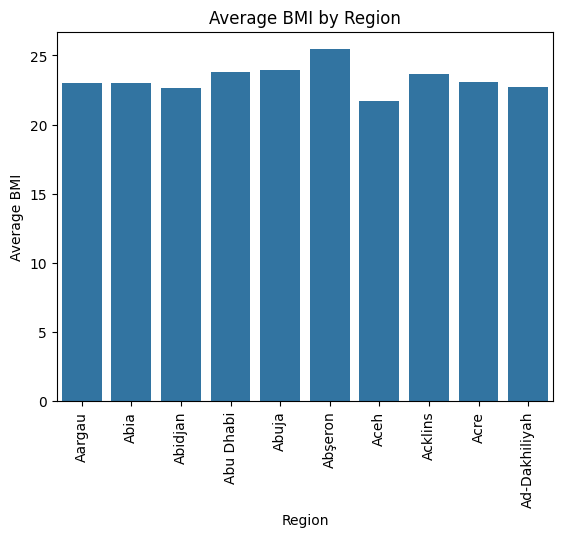

In [126]:
import seaborn as sns

sns.barplot(x=average_bmi_reigon.index, y=average_bmi_reigon.values)
plt.title('Average BMI by Region')
plt.xlabel('Region')
plt.ylabel('Average BMI')
plt.xticks(rotation=90)
plt.show()

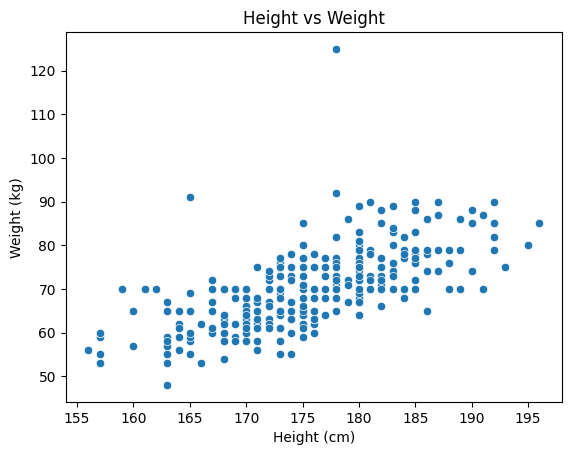

In [131]:
sns.scatterplot(x='height_cm', y='weight_kg', data=df.head(500))
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


In [132]:
df.to_csv('processed_athletes.csv', index=False)